# OpenCV ile görüntü işleme

## <mark style="background-color: lightblue;">OpenCV kullanarak resim ve video içe aktarma, kamera açma ve video kaydetme</mark>



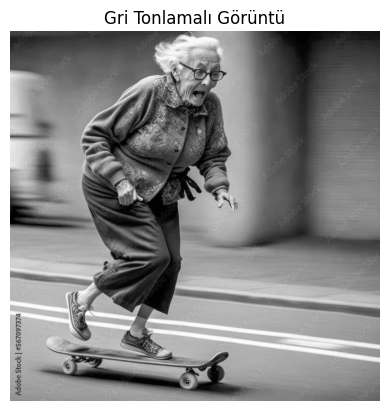

In [1]:
import cv2  # OpenCV kütüphanesi
import matplotlib.pyplot as plt

img = cv2.imread("nene.jpg", 0)  # Görüntüyü gri tonlamalı olarak oku

cv2.imshow("İlk Resim", img)  # Pencere adı "İlk Resim" olarak belirlenir

# Kullanıcının bir tuşa basmasını bekle (0 sonsuz bekleme süresidir)
k = cv2.waitKey(0) & 0xFF  

if k == 27:  # ESC tuşunun ASCII değeri 27'dir
    cv2.destroyAllWindows() # pencereyi kapat


elif k == ord('s'):  # 's' harfinin ASCII karşılığı ile karşılaştır
    cv2.imwrite("nene_gray.png", img)  # Gri tonlamalı resmi kaydet
    cv2.destroyAllWindows()
    
# matplotlib ile çizdirme
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.title("Gri Tonlamalı Görüntü")
plt.show() 


In [2]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

video_name = "MOT17-04-DPM.mp4"  
cap = cv2.VideoCapture(video_name) #  Video içe aktarma (capture işlemi)

print("Genişlik: ", cap.get(3))  # Video genişliği
print("Yükseklik: ", cap.get(4))  # Video yüksekliği

#  Video açılmazsa 
if cap.isOpened() == False:
    print("Hata: Video açılamadı!")

#  Video framelerini okuma döngüsü
while True:
    ret, frame = cap.read()  # Videodan bir kare oku
    # ret: Return Flag --> Okuma işleminin başarılı olup olmadığını gösteren Boolean 
    # frame: Okunan görüntü karesi --> NumPy dizisi

    if ret == True:  
        time.sleep(0.01)  # Videoyu doğal hızında oynatmak için bekleme süresi ekle
        # kafaya göre değil. 30 FPS bir video için → 1 / 30 = 0.033 saniye beklenmelidir.
        cv2.imshow("Video", frame)  # Kareyi ekranda göster
        
    else:
        break
        
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()  # Video yakalamayı serbest bırak
cv2.destroyAllWindows()  # Açılan tüm OpenCV pencerelerini kapat


Genişlik:  1920.0
Yükseklik:  1080.0


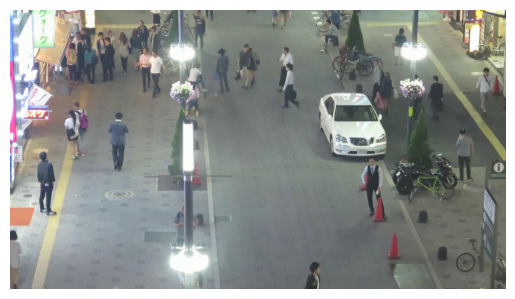

In [ ]:
# Matplotlib ile oynat:
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

video_name = "MOT17-04-DPM.mp4"
cap = cv2.VideoCapture(video_name)


fps = cap.get(cv2.CAP_PROP_FPS) # FPS değerini al ve bekleme süresini hesapla
frame_delay = 1 / fps  # FPS'ye göre bekleme süresi ayarla

while cap.isOpened():
    ret, frame = cap.read() 

    if not ret:  
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # BGR → RGB dönüşümü (Matplotlib doğru renk gösterir)

    plt.imshow(frame)
    plt.axis("off")  
    display(plt.gcf())  
    clear_output(wait=True)  # Önceki kareyi temizle
    time.sleep(frame_delay)  # FPS'ye uygun süre bekle

cap.release()



In [17]:
import cv2  

#  Kamerayı başlat (0: Varsayılan kamera)
cap = cv2.VideoCapture(0)


width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Genişlik
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Yükseklik
print("Genişlik:", width, "Yükseklik:", height)  # Çözünürlüğü ekrana yazdır

# Video kaydetme için `VideoWriter` nesnesi oluştur
# - "video_kaydi.mp4" → Kaydedilecek dosyanın adı
# - `cv2.VideoWriter_fourcc(*"DIVX")` → Codec formatı (Alternatif: 'XVID', 'MJPG', 'MP4V')
# - 20 → FPS (Saniyedeki kare sayısı)
# - (width, height) → Video boyutu
writer = cv2.VideoWriter("video_kaydi.mp4", cv2.VideoWriter_fourcc(*"DIVX"), 20, (width, height))

#  Kamera görüntüsünü kaydetme döngüsü
while True:
    ret, frame = cap.read() 

    if not ret:  
        break

    cv2.imshow("Video", frame)  # Anlık olarak videoyu ekranda göster

    writer.write(frame)  

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break


cap.release()  # Kamerayı kapat
writer.release()  # Video dosyasını kapat
cv2.destroyAllWindows()  # Açılan tüm OpenCV pencerelerini kapat


Genişlik: 640 Yükseklik: 480


## <mark style="background-color: lightblue;">fgfdf</mark>


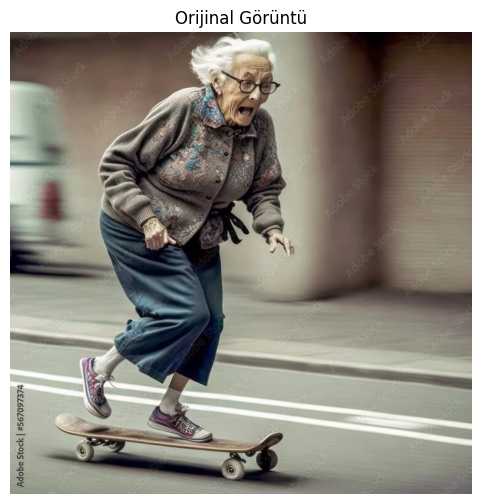

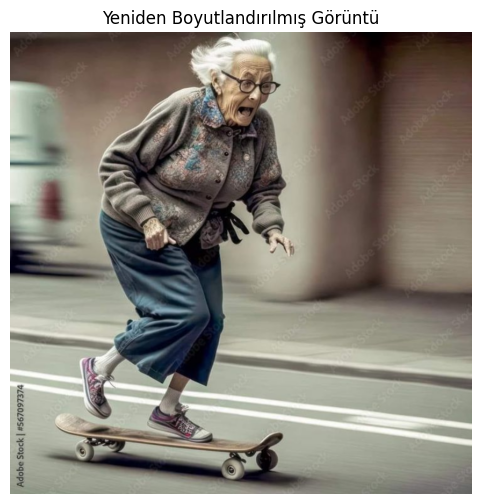

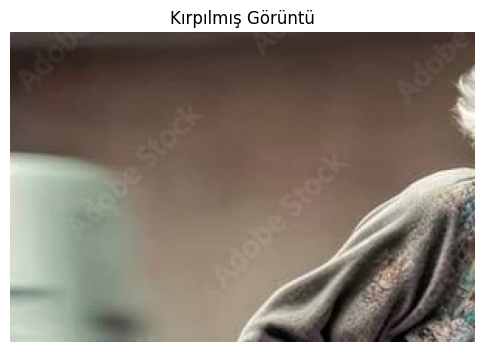

In [22]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("nene.jpg")  # OpenCV BGR formatında okur 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR → RGB dönüşümü

plt.figure(figsize=(6, 6))  # Grafik boyutu
plt.imshow(img_rgb)  # RGB formatında göster
plt.axis("off")  # Eksenleri kapat
plt.title("Orijinal Görüntü")
plt.show()

#  Görüntüyü Yeniden Boyutlandır (Resize)
img_resized = cv2.resize(img_rgb, (800, 800))  # 800x800 boyutuna getir

plt.figure(figsize=(6, 6))
plt.imshow(img_resized)
plt.axis("off")
plt.title("Yeniden Boyutlandırılmış Görüntü")
plt.show()

#  Görüntüyü Kırpma (Crop)
img_cropped = img_rgb[:200, :300]  # İlk 200 satır ve ilk 300 sütunu al

plt.figure(figsize=(6, 6))
plt.imshow(img_cropped)
plt.axis("off")
plt.title("Kırpılmış Görüntü")
plt.show()


In [24]:
import cv2 

img = cv2.imread("nene.jpg") 
print("Resim boyutu:", img.shape) 

cv2.imshow("Orijinal", img) 

imgResized = cv2.resize(img, (800, 800)) 
print("Resized Img Shape:", imgResized.shape)  

cv2.imshow("Img Resized", imgResized) 


imgCropped = img[:200, :300]  
cv2.imshow("Kirpik Resim", imgCropped)  

cv2.waitKey(0) 
cv2.destroyAllWindows()  


Resim boyutu: (736, 736, 3)
Resized Img Shape: (800, 800, 3)


In [25]:
import cv2
import numpy as np

img = cv2.imread("nene.jpg")  
cv2.imshow("Orijinal", img)  


hor = np.hstack((img, img)) 
cv2.imshow("Yatay", hor)  # Yatay olarak birleştirilmiş görüntüyü göster


ver = np.vstack((img, img))  
cv2.imshow("Dikey", ver)  # Dikey olarak birleştirilmiş görüntüyü göster

cv2.waitKey(0)  
cv2.destroyAllWindows()  


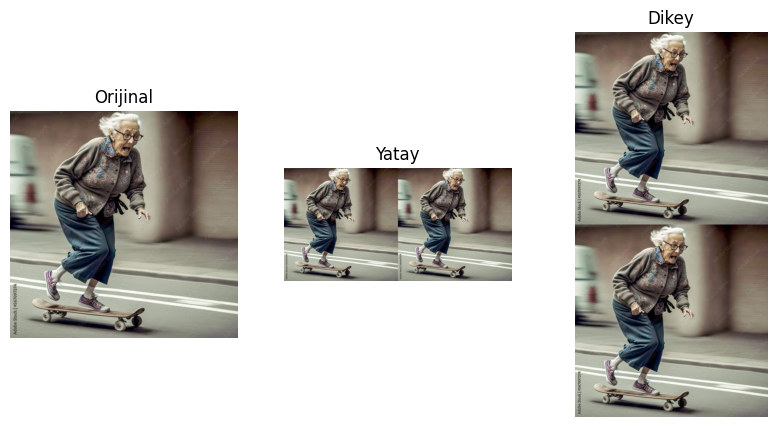

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("nene.jpg")  
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  


hor = np.hstack((img_rgb, img_rgb))  # Yatay olarak birleştir


ver = np.vstack((img_rgb, img_rgb))  # Dikey olarak birleştir

#  Görüntüleri Matplotlib ile gösterme
plt.figure(figsize=(10, 5))

#  Orijinal Görüntü
plt.subplot(1, 3, 1)  # 1 satır, 3 sütun, 1. grafik
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Orijinal")

#  Yatay Birleştirilmiş Görüntü
plt.subplot(1, 3, 2)  # 1 satır, 3 sütun, 2. grafik
plt.imshow(hor)
plt.axis("off")
plt.title("Yatay")

#  Dikey Birleştirilmiş Görüntü
plt.subplot(1, 3, 3)  # 1 satır, 3 sütun, 3. grafik
plt.imshow(ver)
plt.axis("off")
plt.title("Dikey")

plt.show()  # Grafikleri göster


# cv2.warpPerspective() 

### Bir görüntünün perspektifini düzeltmek, eğik bir yüzeyi normalleştirmek veya nesneleri farklı bir açıdan görüntülemek


###  Kamera ile Çekilmiş Eğik Belgeleri Düzeltme (OCR), Plaka Tanıma Sistemleri (ANPR), Yüz Tanıma Sistemleri, Barkod & QR Kod Okuyucular, Robotik ve Otonom Araçlar (Otonom Arabalar, Dronlar)...




In [30]:
import cv2
import numpy as np


img = cv2.imread("nene.jpg")  
cv2.imshow("Orijinal", img)  


width = 400 
height = 500  


pts1 = np.float32([[230, 1], [1, 472], [540, 150], [338, 617]]) 
pts2 = np.float32([[0, 0], [0, height], [width, 0], [width, height]]) 

#  Perspektif dönüşüm matrisini hesapla
matrix = cv2.getPerspectiveTransform(pts1, pts2)
print("Dönüşüm Matrisi:\n", matrix)  # Perspektif dönüşüm matrisini ekrana yazdır

#  Perspektif dönüşümünü uygula
imgOutput = cv2.warpPerspective(img, matrix, (width, height))

#  Son görüntüyü göster
cv2.imshow("Nihai Resim", imgOutput)

cv2.waitKey(0)  
cv2.destroyAllWindows()  


Dönüşüm Matrisi:
 [[ 9.88318421e-01  4.80519997e-01 -2.27793757e+02]
 [-4.28952606e-01  8.92451730e-01  9.77666476e+01]
 [-1.23898125e-04  7.89697479e-05  1.00000000e+00]]


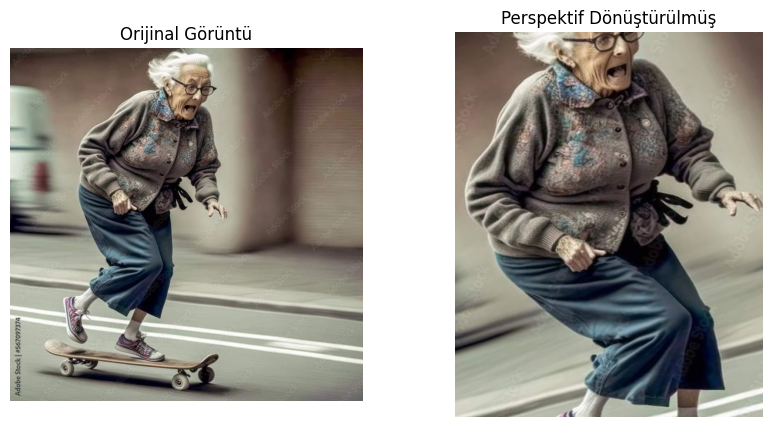

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("nene.jpg")  
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 


width = 400
height = 500


pts1 = np.float32([[230, 1], [1, 472], [540, 150], [338, 617]]) 
pts2 = np.float32([[0, 0], [0, height], [width, 0], [width, height]])  # Hedef noktalar


matrix = cv2.getPerspectiveTransform(pts1, pts2)


imgOutput = cv2.warpPerspective(img, matrix, (width, height))
imgOutput_rgb = cv2.cvtColor(imgOutput, cv2.COLOR_BGR2RGB)  


plt.figure(figsize=(10, 5))

#  Orijinal Görüntü
plt.subplot(1, 2, 1)  # 1 satır, 2 sütun, 1. grafik
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Orijinal Görüntü")

#  Perspektif Dönüştürülmüş Görüntü
plt.subplot(1, 2, 2)  # 1 satır, 2 sütun, 2. grafik
plt.imshow(imgOutput_rgb)
plt.axis("off")
plt.title("Perspektif Dönüştürülmüş")

plt.show()  # Grafikleri göster


In [1]:
import cv2
import matplotlib.pyplot as plt


img1 = cv2.imread("nene.jpg")  


img2 = cv2.imread("bebe.jpg")  


print("img1 boyutu:", img1.shape)  # (yükseklik, genişlik, kanal sayısı)
print("img2 boyutu:", img2.shape)


img1 = cv2.resize(img1, (600, 600))
img2 = cv2.resize(img2, (600, 600))

print("Yeni img1 boyutu:", img1.shape)
print("Yeni img2 boyutu:", img2.shape)

#  Görüntüleri karıştır (Blending)
# blended = alpha * img1 + beta * img2 + gamma
blended = cv2.addWeighted(src1=img1, alpha=0.3, src2=img2, beta=0.7, gamma=0)


cv2.imshow("Görüntü 1", img1)
cv2.imshow("Görüntü 2", img2)
cv2.imshow("Karıştırılmış Görüntü", blended)

cv2.waitKey(0)  
cv2.destroyAllWindows()  


img1 boyutu: (736, 736, 3)
img2 boyutu: (1121, 564, 3)
Yeni img1 boyutu: (600, 600, 3)
Yeni img2 boyutu: (600, 600, 3)


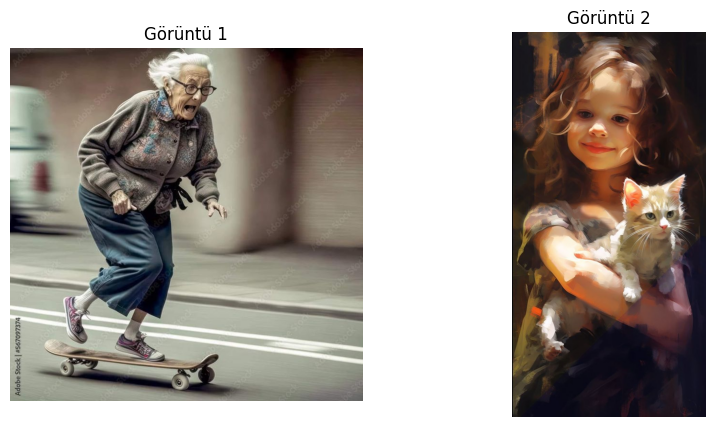

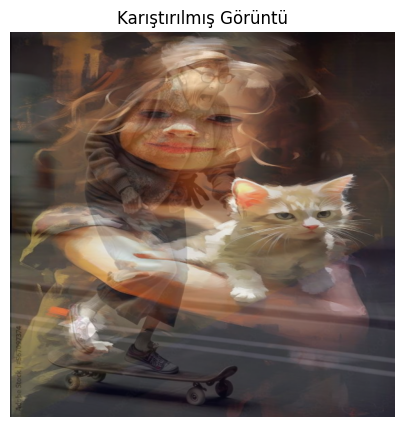

In [3]:
import cv2
import matplotlib.pyplot as plt


img1 = cv2.imread("nene.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("bebe.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis("off")
plt.title("Görüntü 1")

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis("off")
plt.title("Görüntü 2")

plt.show()


img1 = cv2.resize(img1, (600, 600))
img2 = cv2.resize(img2, (600, 600))


blended = cv2.addWeighted(src1=img1, alpha=0.3, src2=img2, beta=0.7, gamma=0)


plt.figure(figsize=(5, 5))
plt.imshow(blended)
plt.axis("off")
plt.title("Karıştırılmış Görüntü")
plt.show()


# Görüntü Eşikleme (Thresholding) 

### Bu işlemde bir pikselin parlaklığı (yoğunluğu), belirlenen eşik değerinin altında veya üstünde olmasına göre siyah (0) veya beyaz (255) yapılır.

### <mark style="background-color: lightblue;">bir görüntüyü ikili (binary) hale getirerek siyah-beyaz formatına çevirir.</mark>

### <mark style="background-color: lightpink;">önemli nesneleri ve arka planı ayırmak için kullanılır</mark>

### OCR (Optik Karakter Tanıma), nesne tespiti, barkod/QR kod okuma gibi uygulamalarda nesneleri belirginleştirmek için.

### Parmak izi tanıma, tıbbi görüntüleme (X-ray, MRI), yüz tanıma, hareket algılama gibi alanlarda veri işleme sürecini kolaylaştırmak için.


Basit Eşikleme (Global Thresholding) ---> cv2.threshold(img, 60, 255, cv2.THRESH_BINARY) ->Tüm pikseller için tek bir eşik değeri belirler.


Uyarlanabilir (Adaptive) Eşikleme ---> cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8) 
-> Farklı ışık seviyelerine sahip alanlara farklı eşikleme uygular.



Text(0.5, 1.0, 'Adaptive Threshold')

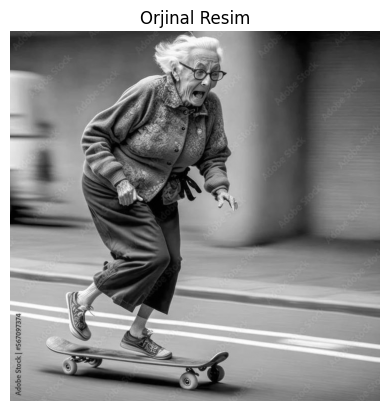

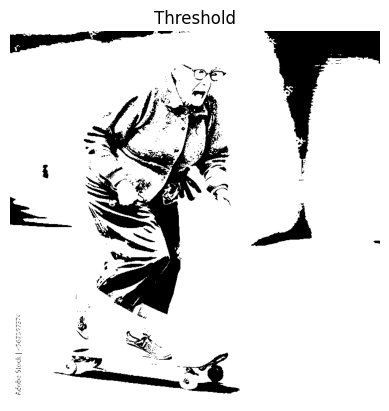

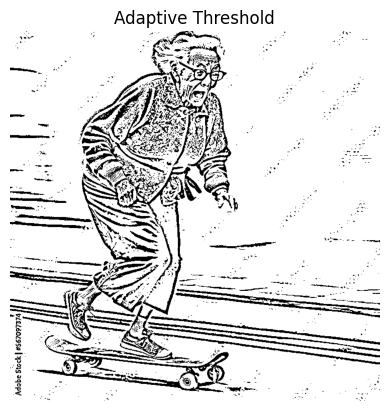

In [4]:
import cv2
import matplotlib.pyplot as plt

# image thresholding: convering color image to binary
img = cv2.imread("nene.jpg")
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Görüntüyü gri tonlamalı hale getir
plt.figure()
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Orjinal Resim")

# eşik değeri belirle
"""
Parametreler
      src girdi dizisi (çok kanallı, 8 bit veya 32 bit kayan nokta).
      dst çıktı dizisi aynı boyut ve tipte ve src ile aynı sayıda kanala sahip.
      eşik değeri.
      THRESH_BINARY ve THRESH_BINARY_INV eşik türleriyle kullanılacak maksimum maksimum değer.
      tür eşikleme türü (bkz. ThresholdTypes).
"""
# threshold değeri üzerindekileri beyaz yap altındakileri siyah yap
_, thresh_img = cv2.threshold(img, thresh = 60, maxval = 255, type = cv2.THRESH_BINARY)

plt.figure()
plt.imshow(thresh_img, cmap="gray")
plt.axis("off")
plt.title("Threshold")
"""
Parametreler
    src Kaynak 8 bitlik tek kanallı görüntü.
    
    dst Aynı boyutta ve src ile aynı tipte hedef görüntüsü.
    maxValue Koşulun karşılandığı piksellere atanan sıfır olmayan değer
    
    adaptiveMethod Kullanılacak uyarlanabilir eşikleme algoritması, bkz. AdaptiveThresholdTypes. 
    BORDER_REPLICATE | BORDER_ISOLATED, sınırları işlemek için kullanılır.
    
    THRESH_BINARY veya THRESH_BINARY_INV olması gereken eşik türü Eşikleme türü, bkz. Eşik Türleri.
    
    blockSize Piksel için bir eşik değeri hesaplamak için kullanılan bir piksel mahallesinin boyutu: 3, 5, 7, vb.
    
    C Sabit, ortalamadan veya ağırlıklı ortalamadan çıkarılır (aşağıdaki ayrıntılara bakın).
    Normalde pozitiftir ancak sıfır veya negatif de olabilir.
"""
"""
Önceki bölümde eşik değer olarak global bir değer kullandık. 
Ancak görüntünün farklı alanlarda farklı aydınlatma koşullarına sahip olduğu tüm koşullarda iyi olmayabilir.
Bu durumda, uyarlamalı eşiklemeye gidiyoruz. 
Bunda, algoritma görüntünün küçük bir bölgesi için eşiği hesaplar. 
böylece aynı görüntünün farklı bölgeleri için farklı eşikler elde ederiz ve 
bu bize farklı aydınlatmaya sahip görüntüler için daha iyi sonuçlar verir.
"""
# cv2.ADAPTIVE_THRESH_MEAN_C: eşik değeri, mahalle alanının ortalamasıdır.
thresh_img2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,8)
plt.figure()
plt.imshow(thresh_img2, cmap="gray")
plt.axis("off")
plt.title("Adaptive Threshold")